# Installation

In this tutorial we show how to install OpenSBT and execute a dummy AEB system in a simplified simulator.

The installation has been tested with Ubuntu 22.04 and Python 3.7. It is recommend having installed git.

With git you need first to open a terminal in the folder where you want to install OpenSBT and clone the repository via (the "!" is only required if executed in this jupyter notebook))


In [1]:
!git clone https://git.fortiss.org/opensbt/opensbt-core.git

Cloning into 'opensbt-core'...
remote: Enumerating objects: 1590, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (266/266), done.
remote: Total 1590 (delta 156), reused 0 (delta 0), pack-reused 1321
Receiving objects: 100% (1590/1590), 89.18 MiB | 1.32 MiB/s, done.
Resolving deltas: 100% (854/854), done.


Now you need to go to the OpenSBT folder via:

In [2]:
cd opensbt-core


/home/sorokin/Projects/testing/search-based-test-case-generation/doc/jupyter/opensbt-core


In [ ]:
and install all dependencies of OpenSBT with the following command (installation might take some seconds, as libraries need to be downloaded):


In [8]:
!pip install -r requirements.txt

The install script will create a virtual environment and install all python dependencies inside the virtual enivornment
. 
Afterwards it will switch to the virtual environment.

We can now test the installation by running our first experiment: Testing a simplified Automated Emergency Braking system in avoiding a collision with a pedestrian. (Note: Only linear motion planning, no comprehensive vehicles dynamics or environmental simulation is used. This system is just for testing the installation of OpenSBT.)
We need to run the first experiment which is already defined in OpenSBT for this. Note, that this is a very simplified system and is only for explaining the usage of OpenSBT.


In [25]:
from importlib import reload
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

# Testing installation

In [3]:
!python run.py -e 5

2023-10-15 19:24:39,371 INFO     Logging setup. Writing to file:  ./log.txt
2023-10-15 19:24:39,373 INFO     Selected experiment: 5
2023-10-15 19:24:39,373 INFO     Pymoo NSGA-II algorithm is used.
2023-10-15 19:24:39,377 INFO     Running evaluation number 1
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       20 |      1 |             - |             -
2023-10-15 19:24:39,426 INFO     Running evaluation number 2
     2 |       40 |      1 |  0.2506841685 |         ideal
2023-10-15 19:24:39,472 INFO     Running evaluation number 3
     3 |       60 |      2 |  1.0000000000 |         ideal
2023-10-15 19:24:39,532 INFO     Running evaluation number 4
     4 |       80 |      6 |  0.0884625903 |         ideal
2023-10-15 19:24:39,577 INFO     Running evaluation number 5
     5 |      100 |      6 |  0.6781598741 |         ideal
2023-10-15 19:24:39,665 INFO     Running evaluation number 6
     6 |      120 |      8 |  0.0105095790 |         ideal
2023-10-15 19:24:39,714

We can now inspect the created result artefacts which are located in the results folder whose path is written in the bottom of the output. We load them in the jupyter notebook:

In [5]:
import pandas as pd
import os
exp_folders = os.listdir(os.getcwd() + "/results/DummySimulatorProblem/NSGA2/")
results_path = os.getcwd() + f"/results/DummySimulatorProblem/NSGA2/{exp_folders[0]}"
df = pd.read_csv(f'{results_path}/all_critical_testcases.csv')
print(df)

    Index  orientation_ego  velocity_ego  orientation_ped  velocity_ped  \
0       0        34.483958      1.221966       259.775382      2.798036   
1       1        34.483958      1.221966       259.775382      2.798036   
2       2        34.483958      1.221966       259.775382      2.798036   
3       3        34.483958      1.221966       259.775382      2.798036   
4       4        34.483958      1.228936       259.775382      2.798036   
5       5        34.483958      1.221966       259.775382      2.798036   
6       6        34.483958      1.228936       259.775382      2.798036   
7       7        34.483958      1.221966       259.775382      2.797910   
8       8        34.483958      1.228936       259.775382      2.798570   
9       9        34.483958      1.221966       259.775382      2.798036   
10     10        34.483958      1.228936       259.775382      2.798036   
11     11        34.483958      1.221966       259.775382      2.797910   
12     12        53.32159

In [6]:
import pandas as pd
import os
df = pd.read_csv(f'{results_path}/all_critical_testcases.csv')
print(df)

    Index  orientation_ego  velocity_ego  orientation_ped  velocity_ped  \
0       0        34.483958      1.221966       259.775382      2.798036   
1       1        34.483958      1.221966       259.775382      2.798036   
2       2        34.483958      1.221966       259.775382      2.798036   
3       3        34.483958      1.221966       259.775382      2.798036   
4       4        34.483958      1.228936       259.775382      2.798036   
5       5        34.483958      1.221966       259.775382      2.798036   
6       6        34.483958      1.228936       259.775382      2.798036   
7       7        34.483958      1.221966       259.775382      2.797910   
8       8        34.483958      1.228936       259.775382      2.798570   
9       9        34.483958      1.221966       259.775382      2.798036   
10     10        34.483958      1.228936       259.775382      2.798036   
11     11        34.483958      1.221966       259.775382      2.797910   
12     12        53.32159

Also we can inspect the visulization of the scenarios:   

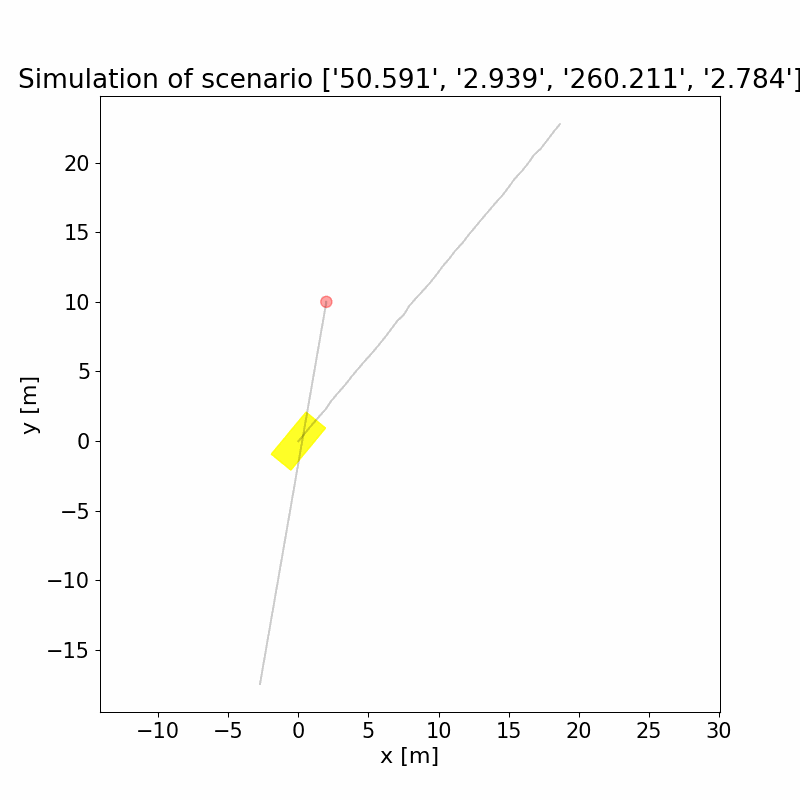

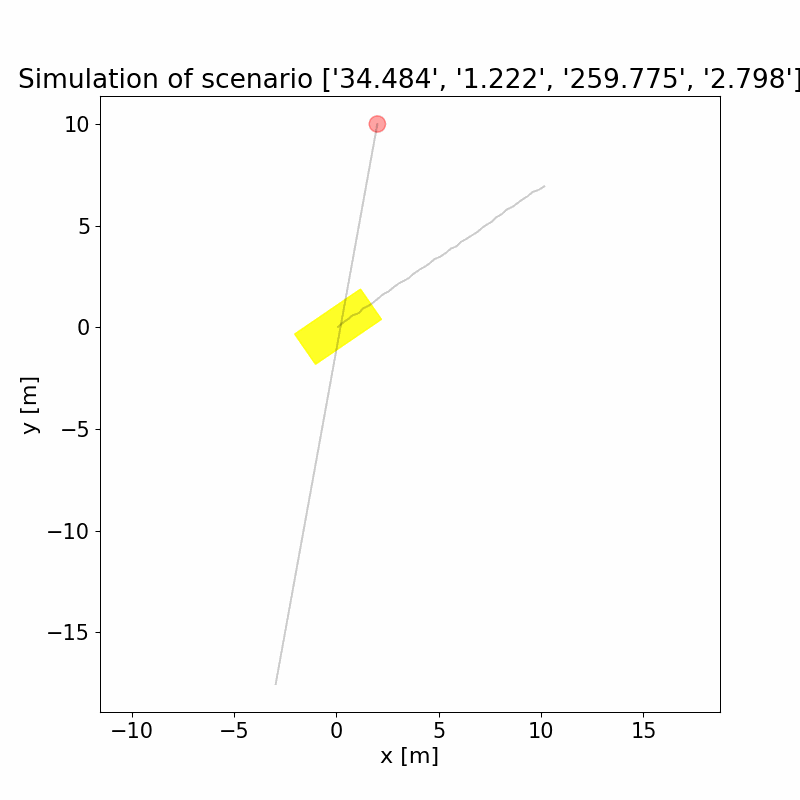

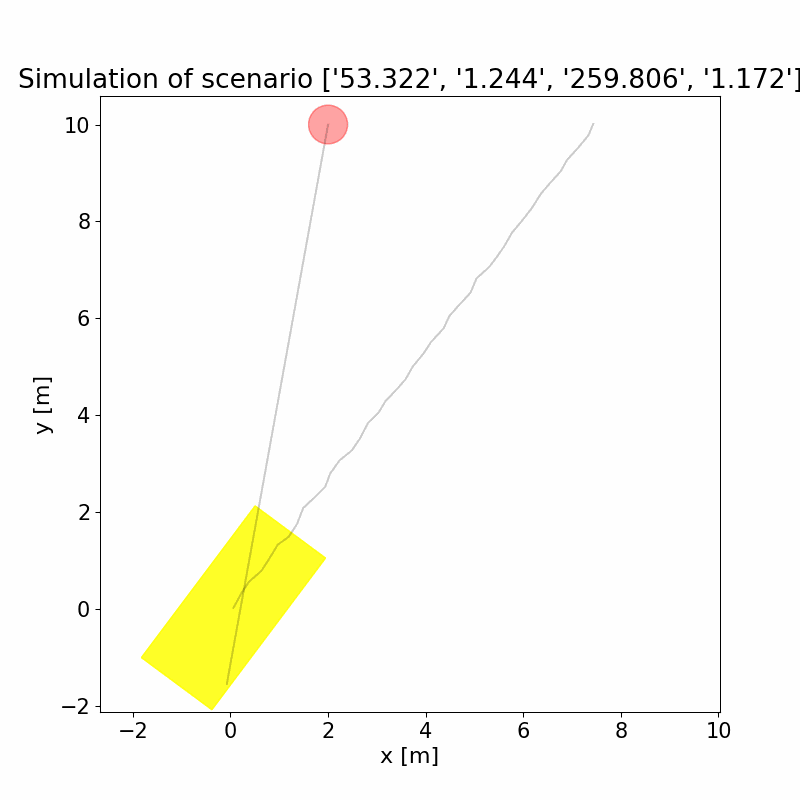

In [7]:
from IPython.display import Image
import os
n = 3 # show max n images
folder_gifs = results_path + os.sep + "gif"
i = 0
for f in os.listdir(folder_gifs):
    # checking if it is a file
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and i < n:
      img = Image(filename=fpath, width=300, height=300)
      display(img)
      i = i+1

Also we can inspect pair-wise test input space plots which are generated for all test cases encountered during search:
    

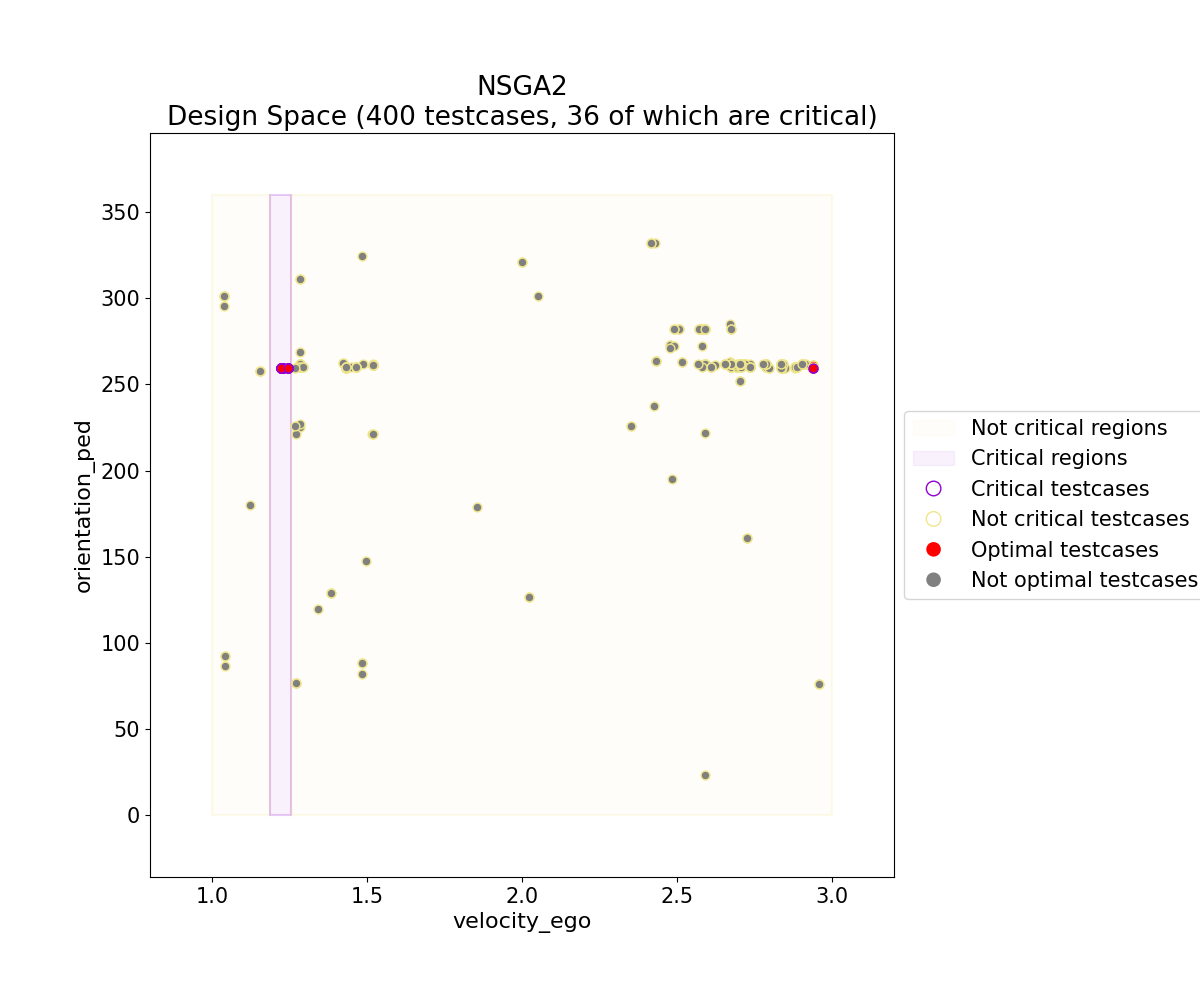

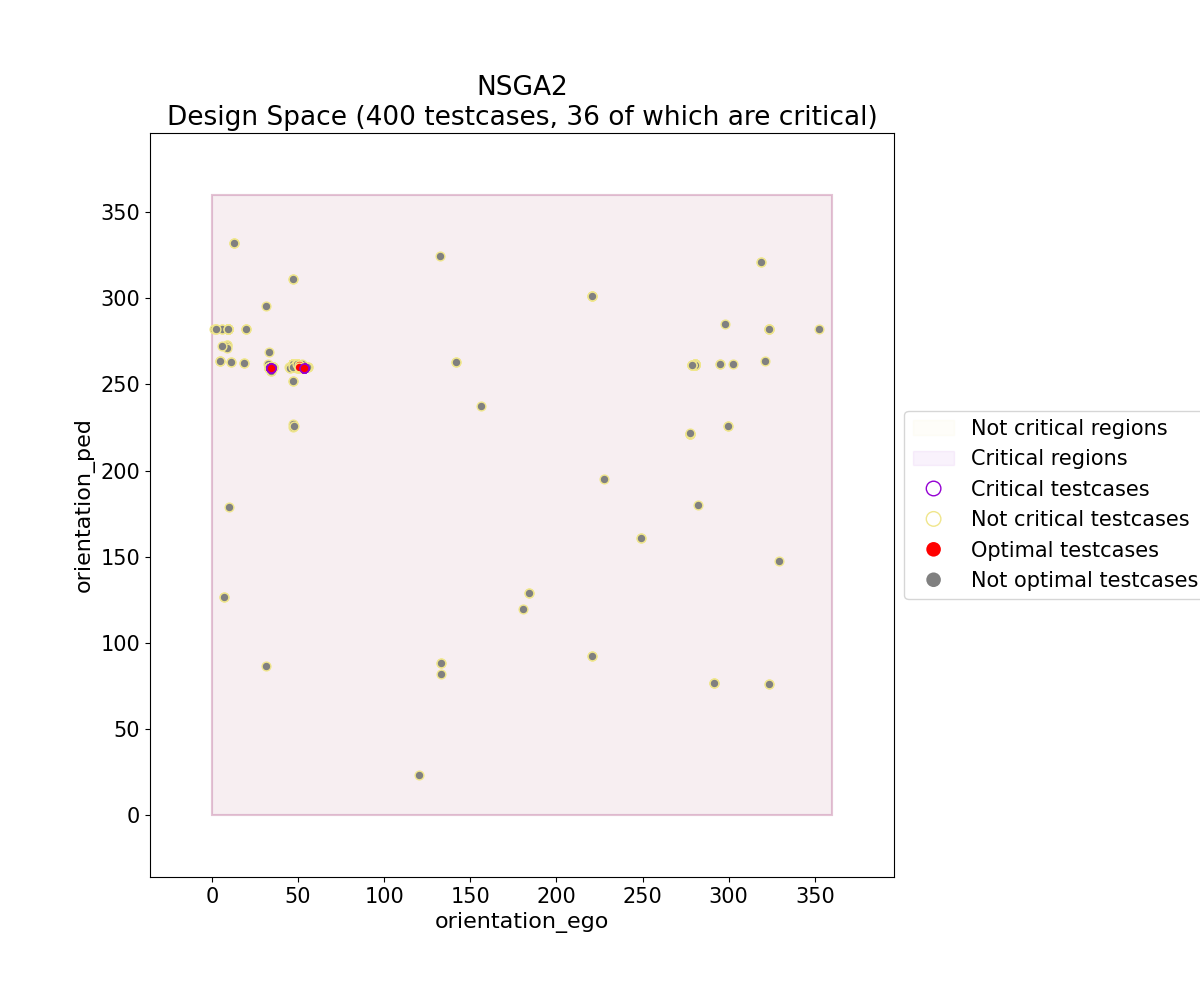

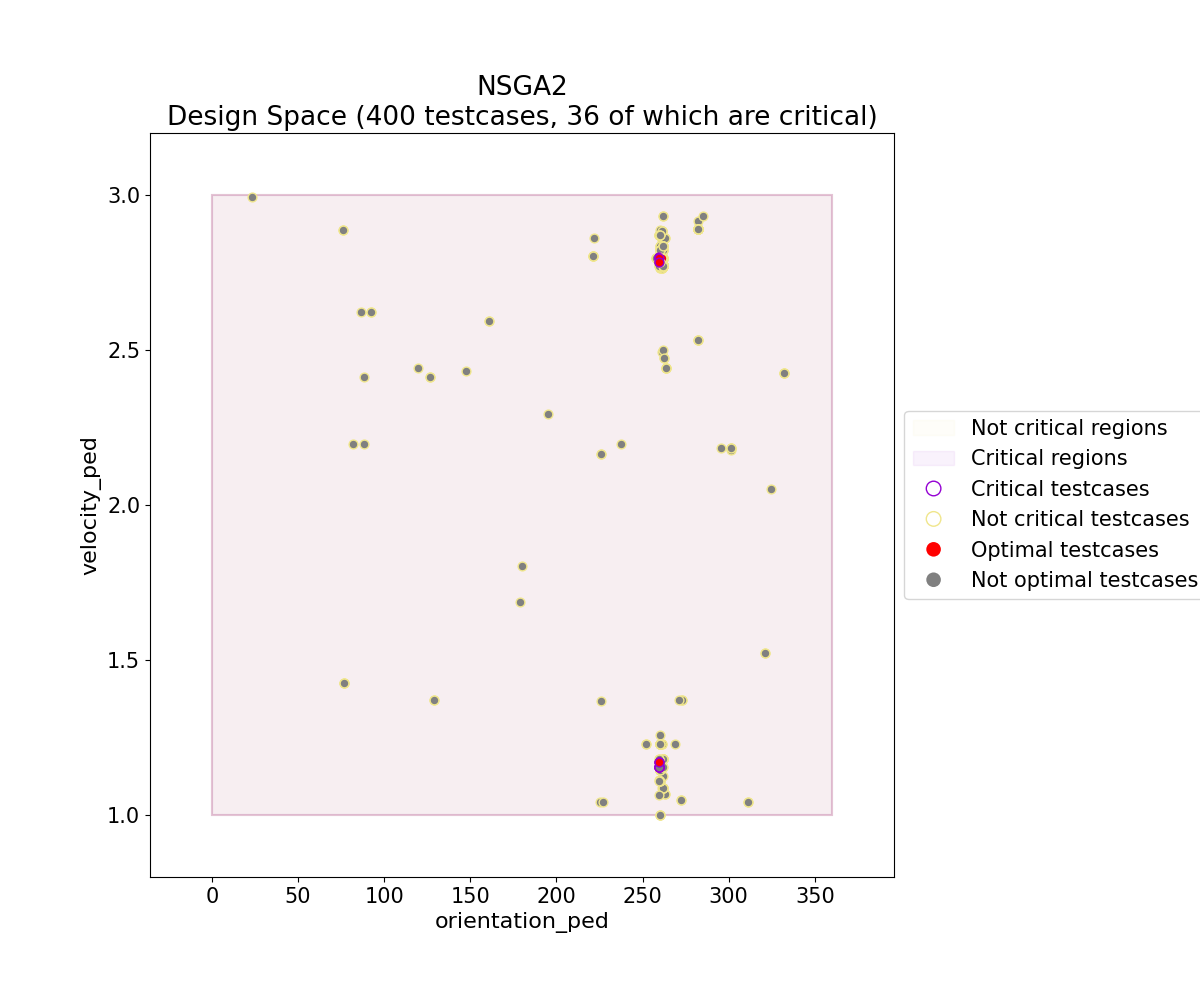

In [8]:
from IPython.display import Image
import os
n = 3 # show max n images
folder_gifs = results_path + os.sep + "design_space"
i = 0
for f in os.listdir(folder_gifs):
    # checking if it is a file
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and os.path.splitext(fpath)[1] == '.png' and  i < n:
      img = Image(filename=fpath, width=500, height=500)
      display(img)
      i = i+1

Also plots are generated that visualize the fitness values of all evaluated test inputs:


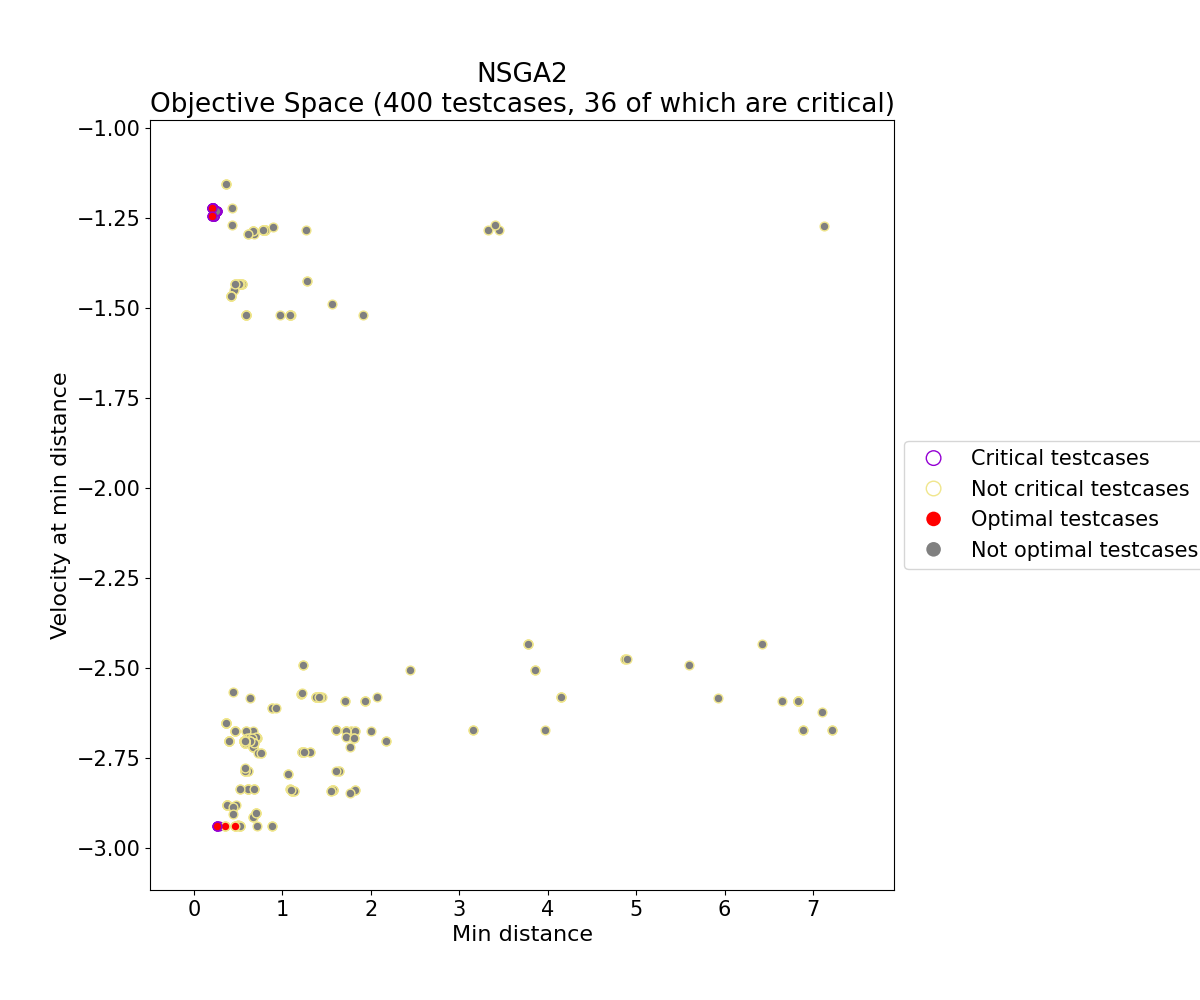

In [10]:
from IPython.display import Image
import os
n = 3 # show max n images
folder_gifs = results_path + os.sep + "objective_space"
i = 0
for f in os.listdir(folder_gifs):
    # checking if it is a file
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and os.path.splitext(fpath)[1] == '.png' and  i < n:
      img = Image(filename=fpath, width=500, height=500)
      display(img)
      i = i+1    

**Note: In the fitness space plot the velocity is negative as the corresponding fitness functions is inverted and minimized internally by pymoo.**